In [2]:
from numpy import savez_compressed

import utils.FaceFeatureEncoder as ffe
# load train dataset
trainX, trainy = ffe.load_dataset(\
    directory='dataset/keras-facenet/5-celebrity-faces-dataset/train/', \
    haar_path='models/haar_vandj/haarcascade_frontalface_default.xml')
print(trainX.shape, trainy.shape)

>loaded 5 examples for class: ben_afflek
>loaded 7 examples for class: eloisa_huaita
>loaded 6 examples for class: lionel_benavides
>loaded 9 examples for class: madonna
>loaded 6 examples for class: elton_john
>loaded 12 examples for class: mindy_kaling
>loaded 5 examples for class: diego_benavides
>loaded 11 examples for class: jerry_seinfeld
>loaded 6 examples for class: emilia_benavides
(67, 160, 160, 3) (67,)


In [4]:
# load test dataset
testX, testy = ffe.load_dataset(directory='dataset/keras-facenet/5-celebrity-faces-dataset/val/', \
    haar_path='models/haar_vandj/haarcascade_frontalface_default.xml')
print(testX.shape, testy.shape)
# save arrays to one file in compressed format
savez_compressed('dataset/keras-facenet/5-celebrity-faces-dataset.npz', trainX, trainy, testX, testy)

>loaded 3 examples for class: ben_afflek
>loaded 4 examples for class: eloisa_huaita
>loaded 1 examples for class: lionel_benavides
>loaded 4 examples for class: madonna
>loaded 1 examples for class: elton_john
>loaded 3 examples for class: mindy_kaling
>loaded 2 examples for class: diego_benavides
>loaded 3 examples for class: jerry_seinfeld
>loaded 3 examples for class: emilia_benavides
(24, 160, 160, 3) (24,)


Predicted: elton_john (25.408)
Expected: lionel_benavides


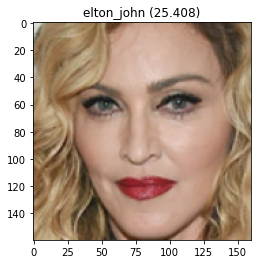

In [5]:
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot

#Load Data
# load faces
data = load('dataset/keras-facenet/5-celebrity-faces-dataset.npz')
testX_faces = data['arr_2']
# load face embeddings
data = load('dataset/keras-facenet/5-celebrity-faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

#Data preparetion & Feature Engineering
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)

#Training model
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)

#Test prediction
# test model on a random example from the test dataset
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
# prediction for the face
samples = expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)

# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])
# plot for fun
pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()